**Approach to loan prediction:**
1. Import all the libraries
2. Load and Audit the data
3. Data preparation and Data Transformation
      1. Missing values: impute all missing values using Mean,Median and Mode
      2. Inconistent values: Replace all inconsistence with consistent values
      3. Outliers: Transform or let algorithm deal
4. Data Visualization
5. Data Analysis
      1. Uni-Variant Analysis(Mean,Median and Mode,Skewness)
      2. Bi-Varient Analysis(Correlation,Covariance,Chi-square test)
      3. Multi-Varient Analysis
          1. Regression:Not a regression problem
              1. Classification: Since outcome variable is Yes or No
              2. Apply decision Tree
              3. Evaluate between Logistic and Decision Tree which is the better model
       


In [1]:
#iMPORTING ALL THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('/content/train_ctrUa4K (1).csv')
test=pd.read_csv('/content/test_lAUu6dG (1).csv')

  Audit the Data

---



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see that 'Dependents' columns has datatype object while it contain values like 1,2,3.. when we use labelencoder to convert it into int some values maybe misplaced which leads to inconsistency data

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.skew()  #close to 0 has no skewness

<ipython-input-6-115de9807545>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()  #close to 0 has no skewness


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

When we see that the data is skewed then basically perform normalization( min_max scaler or z_score only after that we go with the decision tree algorithm


TO VIEW THE DESCRIPTION OF THE CATEGORICAL VARIABLES

<AxesSubplot:>

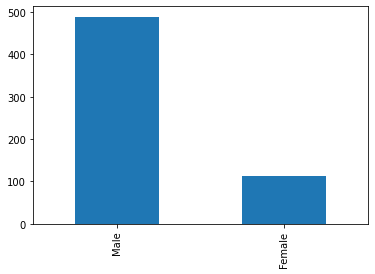

In [7]:
df['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

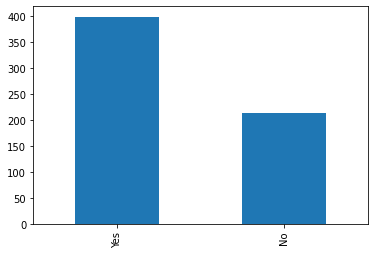

In [8]:
df['Married'].value_counts().plot(kind='bar')

<AxesSubplot:>

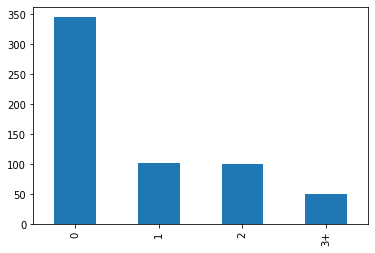

In [9]:
  df['Dependents'].value_counts().plot(kind='bar')

<AxesSubplot:>

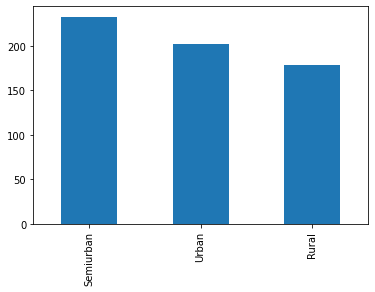

In [10]:
  df['Property_Area'].value_counts().plot(kind='bar')

this categorical variable has good distribution

<AxesSubplot:>

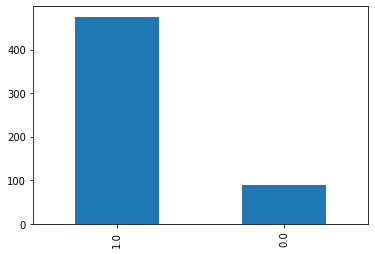

In [11]:
  df['Credit_History'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Education'>

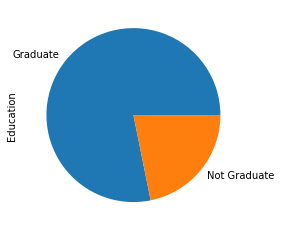

In [12]:
  df['Education'].value_counts().plot(kind='pie')

<AxesSubplot:>

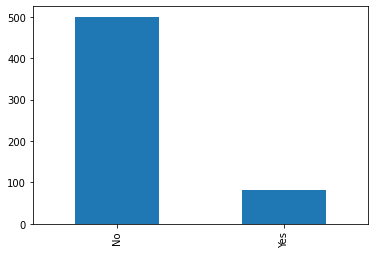

In [13]:
 df['Self_Employed'].value_counts().plot(kind='bar')

In [14]:
#CHECKING THE MISSING VALUES

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

DATA PREPARATION

In [15]:
#Userdefined fun inorder to avoid redundancy of code
def data_prep(df):
  """Categorical variable data preparation and Missing value inputation"""
  df['Gender']=np.where(df['Gender'].isna(),df['Gender'].mode(dropna=True),df['Gender'])
  df['Married']=np.where(df['Married'].isna(),df['Married'].mode(dropna=True),df['Married'])
  df['Dependents']=np.where(df['Dependents'].isna(),df['Dependents'].mode(dropna=True),df['Dependents'])
  df['Dependents'].replace('3+',3,inplace=True)
  df['Dependents']=df['Dependents'].astype('int')
  df['Education']=np.where(df['Education'].isna(),df['Education'].mode(dropna = True),df['Education'])
  df['Self_Employed']=np.where(df['Self_Employed'].isna(),df['Self_Employed'].mode(dropna = True),df['Self_Employed'])
  df['Credit_History']=np.where(df['Credit_History'].isna(),df['Credit_History'].mode(dropna = True),df['Credit_History'])
  """Continous variable data preparation"""
  for i in df.columns:
    if df[i].dtype == 'float':
      df[i]=np.where(df[i].isna(),df[i].median(skipna=True),df[i])
  return df


np.where is a inbuilt func of numpy library

SYNTAX:
    NP.WHERE(Condition,True,)


In [16]:
data_prep(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [18]:
#Drop the 'Loan_ID' column

df.drop(['Loan_ID'],axis=1,inplace=True)

In [19]:
# Encoding the variables

def encode(df):
  le=LabelEncoder()
  for i in df.columns:
    if df[i].dtype == 'object':
      df[i]= le.fit_transform(df[i])
  return df

In [20]:
encode(df)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


Bi-Varient Analysis

---



<AxesSubplot:>

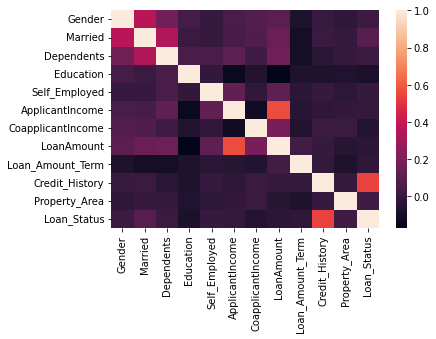

In [21]:
sns.heatmap(df.corr())

Loan status and credit_history are flag variables for which we wont comsider in the correlation
To see the corelation of categorical variables we use chi square testing


In [22]:
from scipy.stats import chi2_contingency

In [23]:

def chi_sq(var1,var2):
  table=pd.crosstab(var1,var2)
  _,p,_,_= chi2_contingency(table)
  if p <= 0.05:
    print('Accept the alternate hypothesis',round(p,2))
  else:
    print('Failed to reject null hypo',round(p,2))
  return table

In [24]:
chi_sq(df['Gender'],df['Loan_Status'])

Failed to reject null hypo 0.74


Loan_Status,0,1
Gender,,
0,37,75
1,155,347


VERY HIGH ERROR SO ENTROPY WILL BE HIGH HENCE IT IS NOT DEPENDENT

In [25]:
chi_sq(df['Credit_History'],df['Loan_Status'])

Accept the alternate hypothesis 0.0


Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,110,415


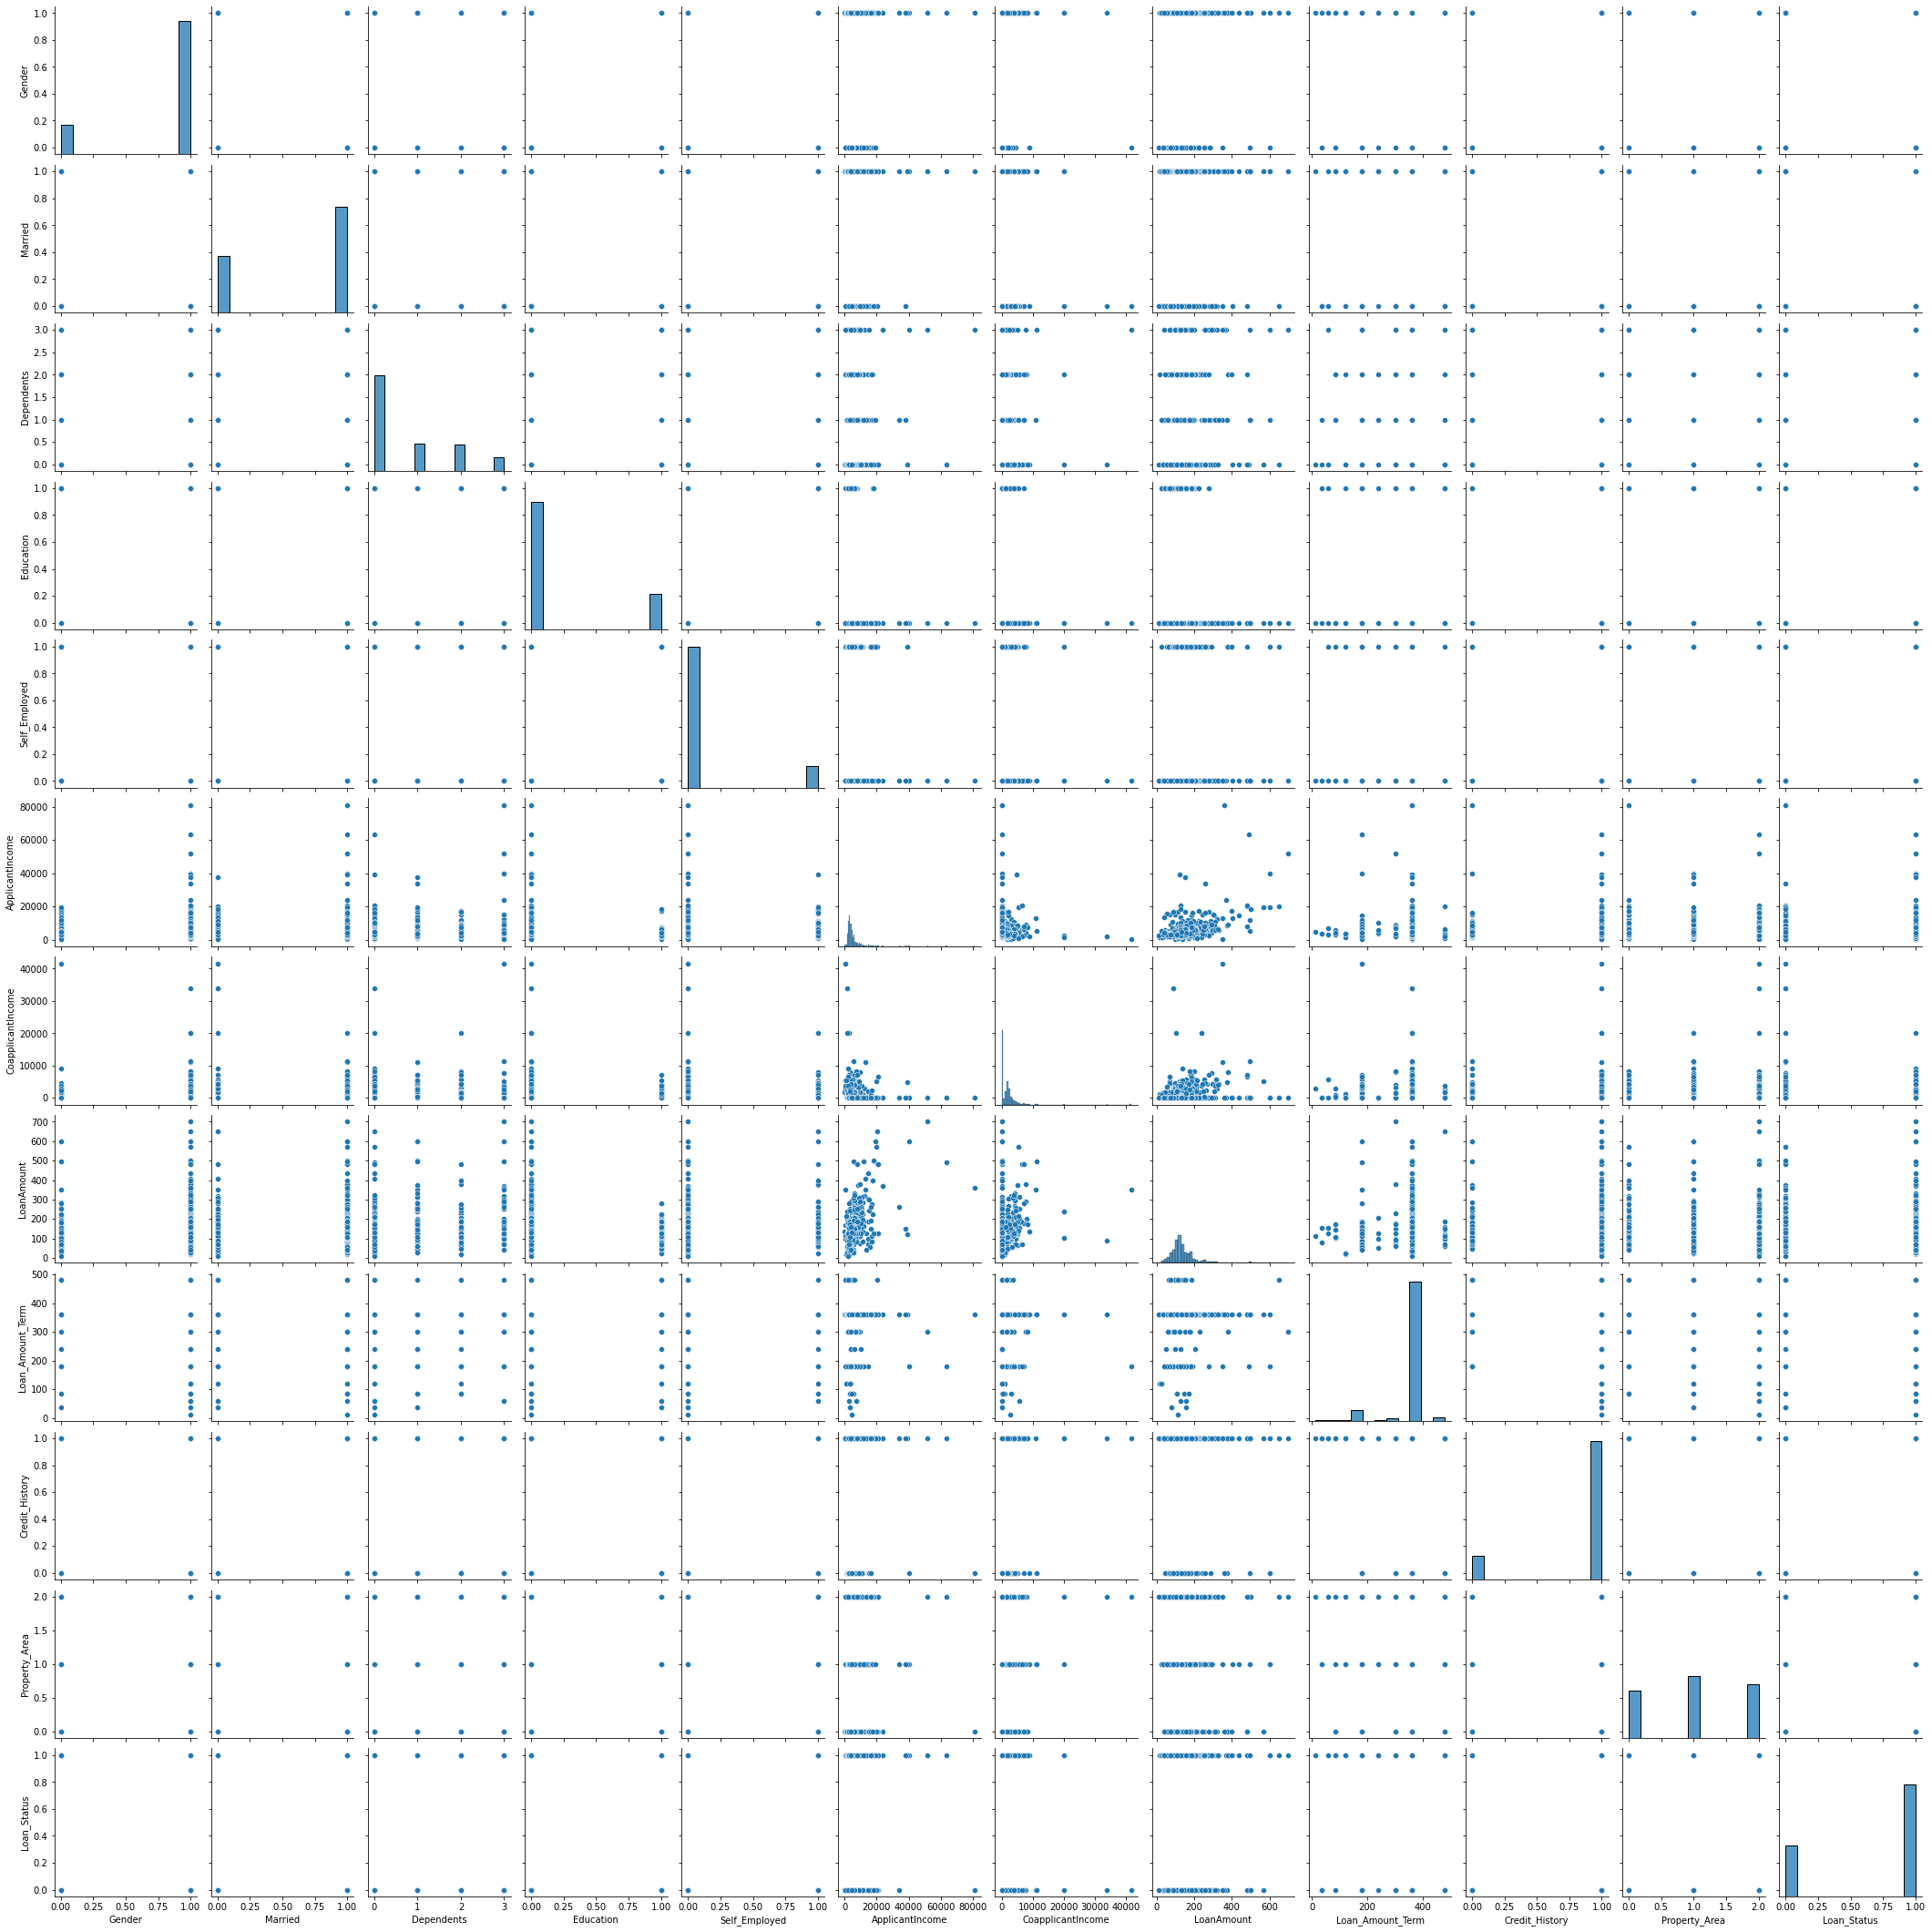

In [26]:
sns.pairplot(df)

LOAN AMT nd apllicant income

categorical:

education and loan status

credit history and loan sts

SPLIT THE TRAIN AND TEST DATA

In [27]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [28]:
print(x.shape)
print(y.shape)

(614, 11)
(614,)


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test .shape)


(491, 11)
(491,)
(123, 11)
(123,)


# LOGISTIC REGRESSION

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
preds_ytrain_lr= lr.predict(x_train)
pred_ytest_lr =lr.predict(x_test)

In [33]:
print(y_train) 

579    1
199    0
266    1
309    1
589    0
      ..
98     1
322    1
382    1
365    0
510    0
Name: Loan_Status, Length: 491, dtype: int64


In [34]:
print(pred_ytest_lr )

[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1]


In [35]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix= confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  print('the accuracy of the model',round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)


In [36]:
acc_report(y_train,preds_ytrain_lr)    #the data which is trained

the accuracy of the model 0.82
[[ 65  85]
 [  5 336]]
              precision    recall  f1-score   support

           0       0.93      0.43      0.59       150
           1       0.80      0.99      0.88       341

    accuracy                           0.82       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.82      0.79       491



false neg 85 and true pos is 65 and acc 

85 and 5 are the error(-ve)

In [37]:
acc_report(y_test,pred_ytest_lr)     #LOW VARIANCE

the accuracy of the model 0.78
[[17 25]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123



compared to train its acc is .78 which is good as its dif is about 5%

low variance model

**BIAS** - Model with high accuracy in train data

**VARIANCE**-  Model with low accuracy in test data 

HIGH BIAS THEN MODEL ACCU WOULD BE NEARLY 50% ACCURATE 

LOW BIAS AND LOW VARIANCE - GOOD MODEL

BOTH HIGH - (BEFORE EXAM LOW AND AFTER EXAM LOW)

LOW BIAS AND HIGH VARIANCE - OVERFITTING(Starts to learn the noise in the data(overconfident))

In [38]:
lr.coef_

array([[ 6.26281359e-02,  4.17076622e-01, -9.45258072e-02,
        -4.15246638e-01, -1.46677090e-01, -1.41674766e-05,
        -3.84079290e-05, -5.50042888e-04, -5.04706935e-03,
         2.93027512e+00,  6.02247019e-02]])

In [39]:
lr.intercept_     #gives the alpha value of model but already present in the lr.predict

array([0.15680039])

In [40]:
lr.predict_proba(x_train)    #in probability

array([[0.23013761, 0.76986239],
       [0.24879764, 0.75120236],
       [0.19489219, 0.80510781],
       [0.28187963, 0.71812037],
       [0.82532771, 0.17467229],
       [0.35873697, 0.64126303],
       [0.16331826, 0.83668174],
       [0.27134771, 0.72865229],
       [0.20375317, 0.79624683],
       [0.85047303, 0.14952697],
       [0.18355825, 0.81644175],
       [0.21176423, 0.78823577],
       [0.25521841, 0.74478159],
       [0.85161945, 0.14838055],
       [0.27220591, 0.72779409],
       [0.21971569, 0.78028431],
       [0.17865274, 0.82134726],
       [0.17355012, 0.82644988],
       [0.16915521, 0.83084479],
       [0.21458646, 0.78541354],
       [0.17796859, 0.82203141],
       [0.23620395, 0.76379605],
       [0.25256156, 0.74743844],
       [0.80091623, 0.19908377],
       [0.75270908, 0.24729092],
       [0.21975381, 0.78024619],
       [0.21480025, 0.78519975],
       [0.84758733, 0.15241267],
       [0.25985822, 0.74014178],
       [0.1674259 , 0.8325741 ],
       [0.

In [41]:
lr.predict(x_train)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

When threshold > 0.5 - 1

when threshold  < 0.5 - 0


# DECISION TREE

Not a great one as it cant give a good accuracy

***Probability of Error:***

  1*[LOG(CLASS1))+(1-1)*LOG(1-CLASS2))

 

**Parameters:**

max_depth  - more variables than required which is not good

min_samples_split(int or float), default=2

max_features- selects which has high IG

random_state- Shuffling

log_loss - proba of error

In [42]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [43]:
acc_report(y_train,preds_dtree_train)    #LOW BIAS

the accuracy of the model 1.0
[[150   0]
 [  0 341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       341

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [44]:
acc_report(y_test,preds_dtree_test)   #HIGH VARIANCE  == OVERFIT

the accuracy of the model 0.73
[[23 19]
 [14 67]]
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        42
           1       0.78      0.83      0.80        81

    accuracy                           0.73       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.73      0.73      0.73       123



In [45]:
#INCRESING THE DEPTH AS IT IS OVERFITTING MODEL

dtree=DecisionTreeClassifier(max_depth=3,min_samples_split=5)   #HYPERTUNING THE DATA
dtree.fit(x_train,y_train)
preds_dtree_train = dtree.predict(x_train)
preds_dtree_test = dtree.predict(x_test)

In [46]:
acc_report(y_train,preds_dtree_train)   

the accuracy of the model 0.82
[[ 67  83]
 [  3 338]]
              precision    recall  f1-score   support

           0       0.96      0.45      0.61       150
           1       0.80      0.99      0.89       341

    accuracy                           0.82       491
   macro avg       0.88      0.72      0.75       491
weighted avg       0.85      0.82      0.80       491



In [47]:
acc_report(y_test,preds_dtree_test)   

the accuracy of the model 0.76
[[16 26]
 [ 3 78]]
              precision    recall  f1-score   support

           0       0.84      0.38      0.52        42
           1       0.75      0.96      0.84        81

    accuracy                           0.76       123
   macro avg       0.80      0.67      0.68       123
weighted avg       0.78      0.76      0.73       123



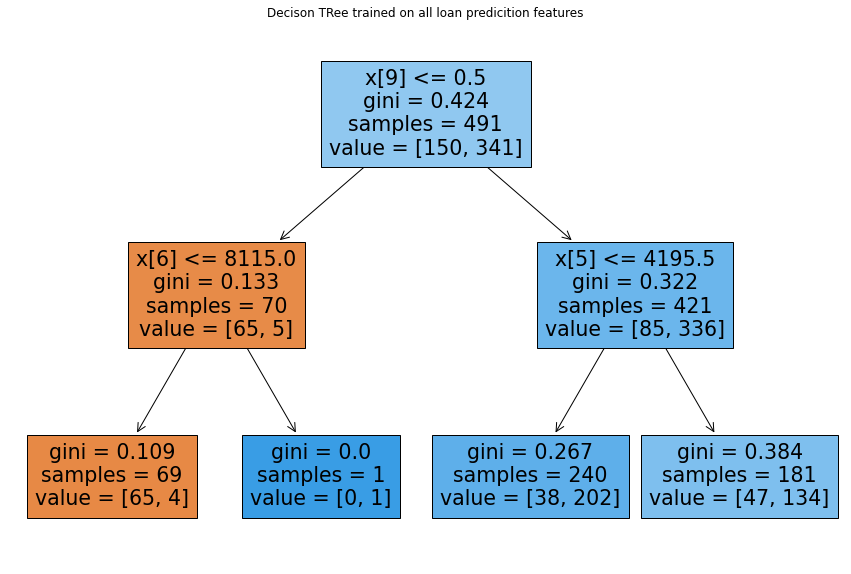

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
clf=DecisionTreeClassifier(max_depth=2).fit(x_train,y_train)
plot_tree(clf,filled=True)
plt.title("Decison TRee trained on all loan predicition features")
plt.show()

# RANDOM FOREST

**Parameters:**

n_estimators(int), default=100 - > no > accuracy

verbose(int) - runtime information

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(verbose=1)
rf.fit(x_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(verbose=1)

In [50]:
preds_rf_train =rf.predict(x_train)
preds_rf_test= rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [66]:
acc_report(y_train,preds_rf_train)  #LOW BIAS

the accuracy of the model 1.0
[[150   0]
 [  0 341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       341

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [65]:
acc_report(y_test,preds_rf_test)   #HIGH VARIANCE

the accuracy of the model 0.8
[[19 23]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.90      0.45      0.60        42
           1       0.77      0.98      0.86        81

    accuracy                           0.80       123
   macro avg       0.84      0.71      0.73       123
weighted avg       0.82      0.80      0.77       123



In [53]:
#HYPERTUNING AS IT OVERFITS

rf= RandomForestClassifier(verbose=1,max_depth=3,n_estimators=50)
rf.fit(x_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomForestClassifier(max_depth=3, n_estimators=50, verbose=1)

In [64]:
acc_report(y_train,preds_rf_train) 

the accuracy of the model 1.0
[[150   0]
 [  0 341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       341

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [63]:
acc_report(y_test,preds_rf_test) 

the accuracy of the model 0.8
[[19 23]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.90      0.45      0.60        42
           1       0.77      0.98      0.86        81

    accuracy                           0.80       123
   macro avg       0.84      0.71      0.73       123
weighted avg       0.82      0.80      0.77       123



# TEST DATA

In [56]:
#Reading the test dataset

test=pd.read_csv('/content/test_lAUu6dG (1).csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [57]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [58]:
#Checking the missing values

test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [59]:
data_prep(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 34.5+ KB


In [61]:
#Encoding the 'Objects'
encode(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [67]:
test.drop(['Loan_ID'],axis = 1,inplace = True)

In [68]:
pred_test_Lr=lr.predict(test)
pred_test_Lr

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [69]:
pred_test_dt=dtree.predict(test)
pred_test_dt

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [70]:
pred_test_rf=rf.predict(test)
pred_test_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,